In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
req.__version__
#import the API key
from config import weather_api_key
import time
from datetime import datetime
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [10]:
#create a set of random latitudes and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs
#zip puts objects into a tuple

In [11]:
#add latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [12]:
#coordinates

In [13]:
#create a list to hold the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for i in coordinates:
    city=(citipy.nearest_city(i[0], i[1]).city_name)
    #if city is unique add it to the list
    if city not in cities:
        cities.append(city)
#print to confirm count
len(cities)
cities

['ushuaia',
 'kodiak',
 'lamesa',
 'ribeira grande',
 'henties bay',
 'rikitea',
 'khatanga',
 'zhezkazgan',
 'vaini',
 'atuona',
 'airai',
 'awjilah',
 'honiara',
 'mataura',
 'ormond beach',
 'carnarvon',
 'belushya guba',
 'palauig',
 'talnakh',
 'bathsheba',
 'almaznyy',
 'ahipara',
 'clyde river',
 'potsdam',
 'labuhan',
 'nikolskoye',
 'coihaique',
 'amapa',
 'trinidad',
 'taolanaro',
 'san cristobal',
 'new norfolk',
 'avarua',
 'punta arenas',
 'pisco',
 'villa maria',
 'alice springs',
 'pitangueiras',
 'tamworth',
 'hithadhoo',
 'albany',
 'boca do acre',
 'vardo',
 'barrow',
 'rawannawi',
 'bluff',
 'chuy',
 'longyearbyen',
 'yelan',
 'muros',
 'quatre cocos',
 'saint anthony',
 'san quintin',
 'preobrazheniye',
 'pevek',
 'orumiyeh',
 'marrakesh',
 'oxford',
 'nantucket',
 'aflu',
 'prado',
 'hindoria',
 'east london',
 'hermanus',
 'ponta do sol',
 'mega',
 'yellowknife',
 'saldanha',
 'busselton',
 'bethel',
 'hambantota',
 'kalmunai',
 'saint-philippe',
 'castro',
 'tuat

In [14]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
# Create an endpoint URL for a city.
#city_url = url + "&q=" + city

In [15]:
#create an empty list to hold city data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("-----------------------------")

#create counters
record_count=1
set_count=1

Beginning Data Retrieval      
-----------------------------


In [8]:
#loop through all cities in our list:
#enumerate iterates through list of cities and retrieves both the index and the city from the list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        #prgram pauses for 60 seconds you can only do 60 calls per minutes on OpenWeatherMap API free version
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url= url + "&q=" + city.replace(" ","+")
        
    #log the URL, record, and set the numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #add 1 to the record count
    record_count+=1

        
#run an API request for each of the cities
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            # If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | samusu
City not found. Skipping...
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | mahebourg


KeyboardInterrupt: 

In [16]:
#convert the array of dictinoaries to a Pandas DataFrame
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df
#city_data_df=pd.DataFrame(city_data)
#city_data_df.head(10)

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lata,PT,2021-12-17 20:13:27,40.1629,-8.3327,54.81,69,0,4.47
1,1,Severo-Kurilsk,RU,2021-12-17 20:13:28,50.6789,156.1250,27.39,88,100,29.80
2,2,Mount Gambier,AU,2021-12-17 20:13:28,-37.8333,140.7667,62.51,82,90,16.11
3,3,Yellowknife,CA,2021-12-17 20:08:33,62.4560,-114.3525,-25.71,99,53,5.37
4,4,Northam,GB,2021-12-17 20:13:28,51.0333,-4.2167,45.39,87,10,13.13
...,...,...,...,...,...,...,...,...,...,...
559,559,Leh,IN,2021-12-17 20:29:36,34.1667,77.5833,-3.44,57,0,4.41
560,560,Lazaro Cardenas,MX,2021-12-17 20:29:38,17.9583,-102.2000,83.32,64,100,8.39
561,561,Adwa,ET,2021-12-17 20:29:38,14.1646,38.8955,62.47,52,6,1.14
562,562,Palmer,US,2021-12-17 20:29:39,42.1584,-72.3287,57.81,19,40,3.00


In [17]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2021-12-17 20:13:27,40.1629,-8.3327,54.81,69,0,4.47
1,Severo-Kurilsk,RU,2021-12-17 20:13:28,50.6789,156.1250,27.39,88,100,29.80
2,Mount Gambier,AU,2021-12-17 20:13:28,-37.8333,140.7667,62.51,82,90,16.11
3,Yellowknife,CA,2021-12-17 20:08:33,62.4560,-114.3525,-25.71,99,53,5.37
4,Northam,GB,2021-12-17 20:13:28,51.0333,-4.2167,45.39,87,10,13.13
...,...,...,...,...,...,...,...,...,...
559,Leh,IN,2021-12-17 20:29:36,34.1667,77.5833,-3.44,57,0,4.41
560,Lazaro Cardenas,MX,2021-12-17 20:29:38,17.9583,-102.2000,83.32,64,100,8.39
561,Adwa,ET,2021-12-17 20:29:38,14.1646,38.8955,62.47,52,6,1.14
562,Palmer,US,2021-12-17 20:29:39,42.1584,-72.3287,57.81,19,40,3.00


In [18]:
#this was ouputted and saved already - I reopened and then imported the csv so I didn't 
#have to rerun the loop to get the list of 500 cities into a dictionary
# output_data_file="weather_data/cities.csv"
# #export the city_data into a csv
# city_data_df.to_csv(output_data_file, index_label="City ID")

In [19]:
import time

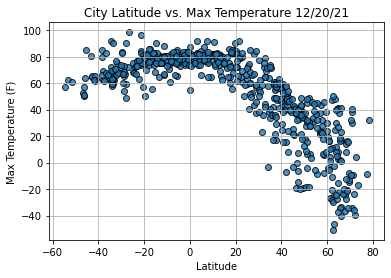

In [20]:
#create a scatter plot for max temp vs. latitude for different cities
#extract data
#

lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

#build scatter 
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

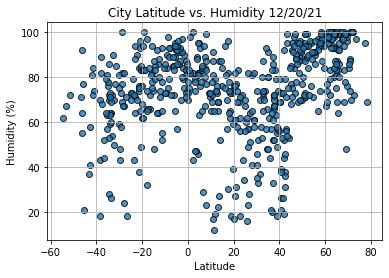

In [21]:
#build scatter 
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

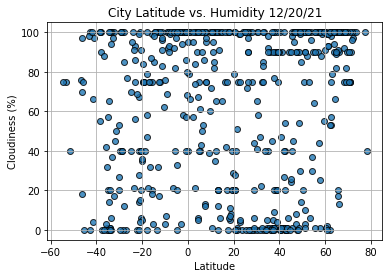

In [22]:
#build scatter 
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

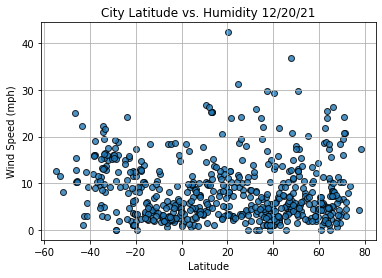

In [23]:
#build scatter 
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [40]:
#create a function to create perform linear regression on the weather data
#plot regression line and the equation with the data
def plot_line_regression(x_values,y_values,title,y_label,text_coordinates):
    #run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [41]:
north_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
south_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

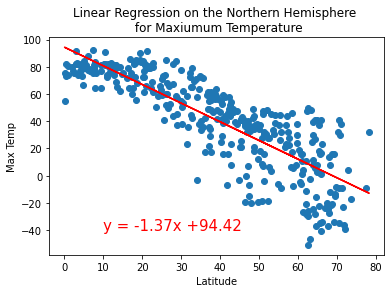

In [49]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Max Temp"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maxiumum Temperature", "Max Temp",(10,-40))

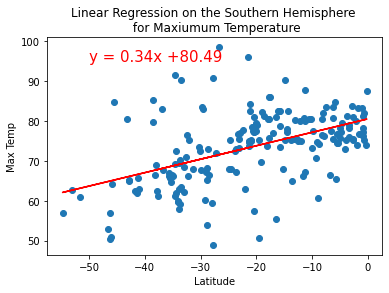

In [48]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Max Temp"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maxiumum Temperature", "Max Temp",(-50, 95))

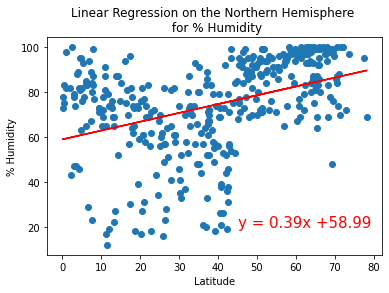

In [55]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Humidity"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(45,20))

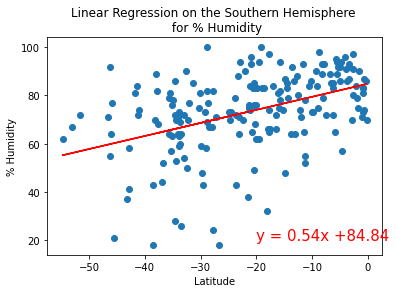

In [59]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Humidity"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-20,20))

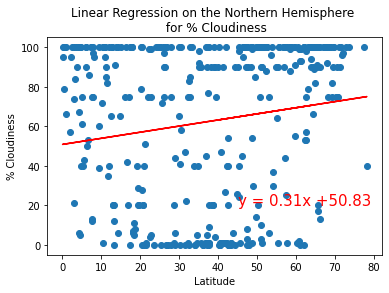

In [60]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Cloudiness"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(45,20))

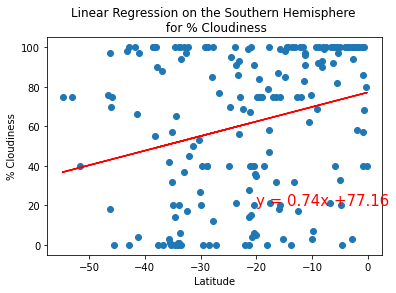

In [61]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Cloudiness"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-20,20))

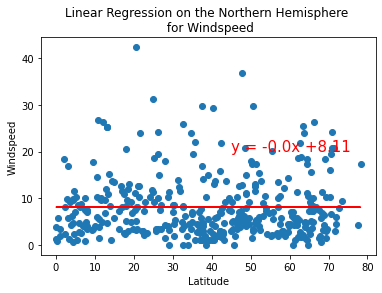

In [63]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Wind Speed"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for Windspeed", "Windspeed",(45,20))

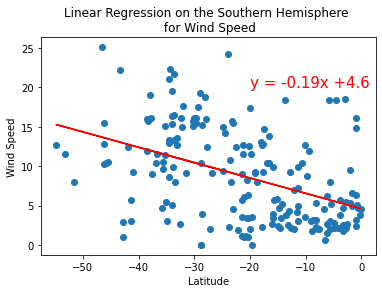

In [64]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Wind Speed"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-20,20))